In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.ion()

In [ ]:
def sig_class(data_vectors, weight_vector, bias):

    class_vals = []

    for x_i in data_vectors:

        decision = 1 / (1 + np.exp(-1 * (np.sum(weight_vector * x_i) + np.sum(bias))))
        class_vals.append(decision)

    return np.array(class_vals)
    
sample_data = np.array([
    [7, 13],
    [12, 11],
    [7, 27],
    [2, 3],
])

sample_w = np.array([1, -1])
sample_b = np.array([2.0])

decisions = sig_class(sample_data, sample_w, sample_b)
for i in range(0, len(decisions)):
    print('f(x={}, w={}, b={}): {}'.format(
        sample_data[i],
        sample_w,
        sample_b,
        decisions[i],
    ))

In [ ]:
def sigmoid_2d(weights, bias, left_xlim=-5, right_xlim=5):

    mesh_distance = 20

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.set_title('Control Data')
    fig.tight_layout()

    x = np.linspace(left_xlim, right_xlim, mesh_distance)
    y = np.linspace(left_xlim, right_xlim, mesh_distance)

    xy = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    z = sig_class(xy, np.array(weights), np.array(bias)) + np.random.uniform(-0.05, 0.05, xy[:,0].shape)

    ax. scatter3D(xy[:,0], xy[:,1], z, c=z, cmap='Greens')

    return fig, ax

sig_fig, sig_ax = sigmoid_2d([ 0.7, 0.8 ], 0.5)

Learned weights after 100 iterations is [1. 1.]. The control weights were [0.5, 0.9].
Learned bias after 100 iterations is 0.0. The control bias was 0.5.


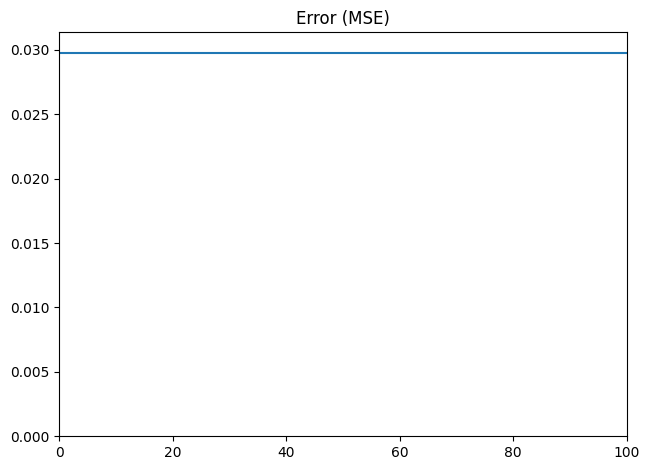

In [10]:
def gradient(weights, bias, xy_pairs, z_vals):

    sig_vals = sig_class(xy_pairs, weights, bias)

    abs_error = np.subtract(sig_vals, z_vals)

    d_weights = np.array([
        0,
        0,
    ])

    d_bias = 0

    mse = np.sum(abs_error ** 2) / len(abs_error)

    return d_weights, d_bias, mse

def trian_sig(control_weights, control_bias, left_xlim=-5, right_xlim=5, train_iterations=100):

    fig, (err_ax) = plt.subplots(1, 1)
    err_ax.set_title('Error (MSE)')
    fig.tight_layout()

    mesh_distance = 20

    x = np.linspace(left_xlim, right_xlim, mesh_distance)
    y = np.linspace(left_xlim, right_xlim, mesh_distance)
    xy = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    z = sig_class(
        xy,
        np.array(control_weights),
        np.array(control_bias),
    ) + np.random.uniform(-0.05, 0.05, xy[:,0].shape)

    w = np.array([1.0, 1.0])
    b = np.array([0.0])

    learning_rate = 5.0

    dw, db, err = gradient(w, b, xy, z)

    err_vals = [err]
    e, = err_ax.plot(np.arange(0, len(err_vals)), err_vals)

    err_ax.set_ylim(bottom=0)
    err_ax.set_xlim(left=0, right=train_iterations)

    for i in range(train_iterations):

        w = np.subtract(w, np.multiply(learning_rate, dw))
        b = np.subtract(b, np.multiply(learning_rate, db))

        dw, db, err = gradient(w, b, xy, z)
        err_vals.append(err)
        e.set_xdata(np.arange(0, len(err_vals)))
        e.set_ydata(err_vals)

        fig.canvas.draw()
        fig.canvas.flush_events()

    print('Learned weights after {} iterations is {}. The control weights were {}.'.format(
        train_iterations,
        w,
        control_weights,
    ))

    print('Learned bias after {} iterations is {}. The control bias was {}.'.format(
        train_iterations,
        np.sum(b),
        np.sum(control_bias),
    ))

    return fig, err_ax

sig_fig, sig_ax = trian_sig([ 0.5, 0.9 ], [ 0.5 ])